In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Initial inputs
initial_salary = 70000
hike_rate = 0.035
std_dev = 0.07
contribution_rate = 0.06
years = 35
z_score = 1.96  # For 95% confidence level

# Fund details
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05, "contribution_pct": 0.4},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105, "contribution_pct": 0.3},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075, "contribution_pct": 0.3},
}

# Create a DataFrame to store yearly data
columns = ["Year", "Salary", "Total_Contribution"]
for fund in funds:
    columns.extend([
        f"{fund}_Contribution", f"{fund}_Mean", f"{fund}_Min", f"{fund}_Max"
    ])

records = []
salary = initial_salary

# Loop through each year and calculate contributions
for year in range(1, years + 1):
    total_contribution = salary * contribution_rate
    row = [year, salary, total_contribution]
    for fund, details in funds.items():
        contrib_amt = total_contribution * details["contribution_pct"]
        mean_growth = contrib_amt * (1 + details["growth_rate"])
        std_dev_amt = mean_growth * details["volatility"]
        min_val = mean_growth - z_score * std_dev_amt
        max_val = mean_growth + z_score * std_dev_amt
        row.extend([contrib_amt, mean_growth, min_val, max_val])
    records.append(row)
    salary *= (1 + hike_rate)

# Create DataFrame
df = pd.DataFrame(records, columns=columns)

# Calculate cumulative values
summary_columns = ["Year", "Total_Contribution"]
for fund in funds:
    summary_columns.extend([
        f"{fund}_Total_Mean", f"{fund}_Total_Min", f"{fund}_Total_Max"
    ])

summary_records = []
for i in range(years):
    year = df.loc[i, "Year"]
    total_contrib = df.loc[:i, "Total_Contribution"].sum()
    row = [year, total_contrib]
    for fund in funds:
        row.append(df.loc[:i, f"{fund}_Mean"].sum())
        row.append(df.loc[:i, f"{fund}_Min"].sum())
        row.append(df.loc[:i, f"{fund}_Max"].sum())
    summary_records.append(row)

summary_df = pd.DataFrame(summary_records, columns=summary_columns)

# Prepare summary at every 5-year interval
summary_every_5_years = summary_df[summary_df["Year"] % 5 == 0]

from IPython.display import display

# Display the dataframes directly in Colab
print("🔹 Full Yearly Details:")
display(df)

df = df

print("\n🔹 Cumulative Summary Each Year:")
display(summary_df)

summary_df = summary_df

print("\n🔹 Every 5-Year Summary:")
display(summary_every_5_years)
summary_every_5_years = summary_every_5_years

summary_every_5_years.tail()  # Show the last few rows of the 5-year summary


🔹 Full Yearly Details:


,Year,Salary,Total_Contribution,Harboursafe_Contribution,Harboursafe_Mean,Harboursafe_Min,Harboursafe_Max,Horizon_Contribution,Horizon_Mean,Horizon_Min,Horizon_Max,SkyHigh_Contribution,SkyHigh_Mean,SkyHigh_Min,SkyHigh_Max
0,1,70000.000000,4200.000000,1680.000000,1743.000000,1572.186000,1913.814000,1260.000000,1341.900000,1065.736980,1618.063020,1260.000000,1389.150000,824.182695,1954.117305
1,2,72450.000000,4347.000000,1738.800000,1804.005000,1627.212510,1980.797490,1304.100000,1388.866500,1103.037774,1674.695226,1304.100000,1437.770250,853.029089,2022.511411
2,3,74985.750000,4499.145000,1799.658000,1867.145175,1684.164948,2050.125402,1349.743500,1437.476827,1141.644096,1733.309559,1349.743500,1488.092209,882.885107,2093.299310
3,4,77610.251250,4656.615075,1862.646030,1932.495256,1743.110721,2121.879791,1396.984522,1487.788516,1181.601640,1793.975393,1396.984522,1540.175436,913.786086,2166.564786
4,5,80326.610044,4819.596603,1927.838641,2000.132590,1804.119596,2196.145584,1445.878981,1539.861115,1222.957697,1856.764532,1445.878981,1594.081576,945.768599,2242.394553
5,6,83138.041395,4988.282484,1995.312993,2070.137231,1867.263782,2273.010679,1496.484745,1593.756254,1265.761217,1921.751291,1496.484745,1649.874431,978.870500,2320.878363
6,7,86047.872844,5162.872371,2065.148948,2142.592034,1932.618015,2352.566053,1548.861711,1649.537722,1310.062859,1989.012586,1548.861711,1707.620037,1013.130968,2402.109105
7,8,89059.548394,5343.572904,2137.429161,2217.582755,2000.259645,2434.905865,1603.071871,1707.271543,1355.915059,2058.628026,1603.071871,1767.386738,1048.590552,2486.182924
8,9,92176.632587,5530.597955,2212.239182,2295.198151,2070.268733,2520.127570,1659.179387,1767.026047,1403.372086,2130.680007,1659.179387,1829.245274,1085.291221,2573.199327
9,10,95402.814728,5724.168884,2289.667553,2375.530087,2142.728138,2608.332035,1717.250665,1828.871958,1452.490109,2205.253807,1717.250665,1893.268858,1123.276414,2663.261303



🔹 Cumulative Summary Each Year:


,Year,Total_Contribution,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max
0,1,4200.000000,1743.000000,1572.186000,1913.814000,1341.900000,1065.736980,1618.063020,1389.150000,824.182695,1954.117305
1,2,8547.000000,3547.005000,3199.398510,3894.611490,2730.766500,2168.774754,3292.758246,2826.920250,1677.211784,3976.628716
2,3,13046.145000,5414.150175,4883.563458,5944.736892,4168.243327,3310.418851,5026.067804,4315.012459,2560.096892,6069.928026
3,4,17702.760075,7346.645431,6626.674179,8066.616683,5656.031844,4492.020490,6820.043197,5855.187895,3473.882978,8236.492812
4,5,22522.356678,9346.778021,8430.793775,10262.762267,7195.892959,5714.978188,8676.807729,7449.269471,4419.651577,10478.887365
5,6,27510.639161,11416.915252,10298.057557,12535.772947,8789.649212,6980.739404,10598.559020,9099.143903,5398.522077,12799.765728
6,7,32673.511532,13559.507286,12230.675572,14888.339000,10439.186934,8290.802263,12587.571606,10806.763939,6411.653045,15201.874833
7,8,38017.084436,15777.090041,14230.935217,17323.244865,12146.458477,9646.717323,14646.199632,12574.150677,7460.243597,17688.057757
8,9,43547.682391,18072.288192,16301.203949,19843.372435,13913.484524,11050.089409,16776.879639,14403.395951,8545.534818,20261.257084
9,10,49271.851275,20447.818279,18443.932088,22451.704470,15742.356482,12502.579518,18982.133446,16296.664809,9668.811231,22924.518387



🔹 Every 5-Year Summary:


,Year,Total_Contribution,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max
4,5,22522.356678,9346.778021,8430.793775,10262.762267,7195.892959,5714.978188,8676.807729,7449.269471,4419.651577,10478.887365
9,10,49271.851275,20447.818279,18443.932088,22451.704470,15742.356482,12502.579518,18982.133446,16296.664809,9668.811231,22924.518387
14,15,81041.859690,33632.371771,30336.399338,36928.344205,25892.874171,20564.120667,31221.627675,26804.595093,15903.166268,37706.023917
19,20,118774.663616,49291.485401,44460.919831,54122.050970,37948.505025,30138.702691,45758.307359,39284.719991,23307.624371,55261.815611
24,25,163589.398112,67889.600216,61236.419395,74542.781038,52266.812697,41510.302644,63023.322750,54107.193426,32101.797859,76112.588992
29,30,216815.244564,89978.326494,81160.450498,98796.202491,69272.470638,55016.196181,83528.745096,71711.642140,42546.517281,100876.766998
34,35,280030.853502,116212.804203,104823.949391,127601.659015,89469.857694,71056.960981,107882.754407,92620.204796,54951.567505,130288.842086


,Year,Total_Contribution,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max
14,15,81041.859690,33632.371771,30336.399338,36928.344205,25892.874171,20564.120667,31221.627675,26804.595093,15903.166268,37706.023917
19,20,118774.663616,49291.485401,44460.919831,54122.050970,37948.505025,30138.702691,45758.307359,39284.719991,23307.624371,55261.815611
24,25,163589.398112,67889.600216,61236.419395,74542.781038,52266.812697,41510.302644,63023.322750,54107.193426,32101.797859,76112.588992
29,30,216815.244564,89978.326494,81160.450498,98796.202491,69272.470638,55016.196181,83528.745096,71711.642140,42546.517281,100876.766998
34,35,280030.853502,116212.804203,104823.949391,127601.659015,89469.857694,71056.960981,107882.754407,92620.204796,54951.567505,130288.842086


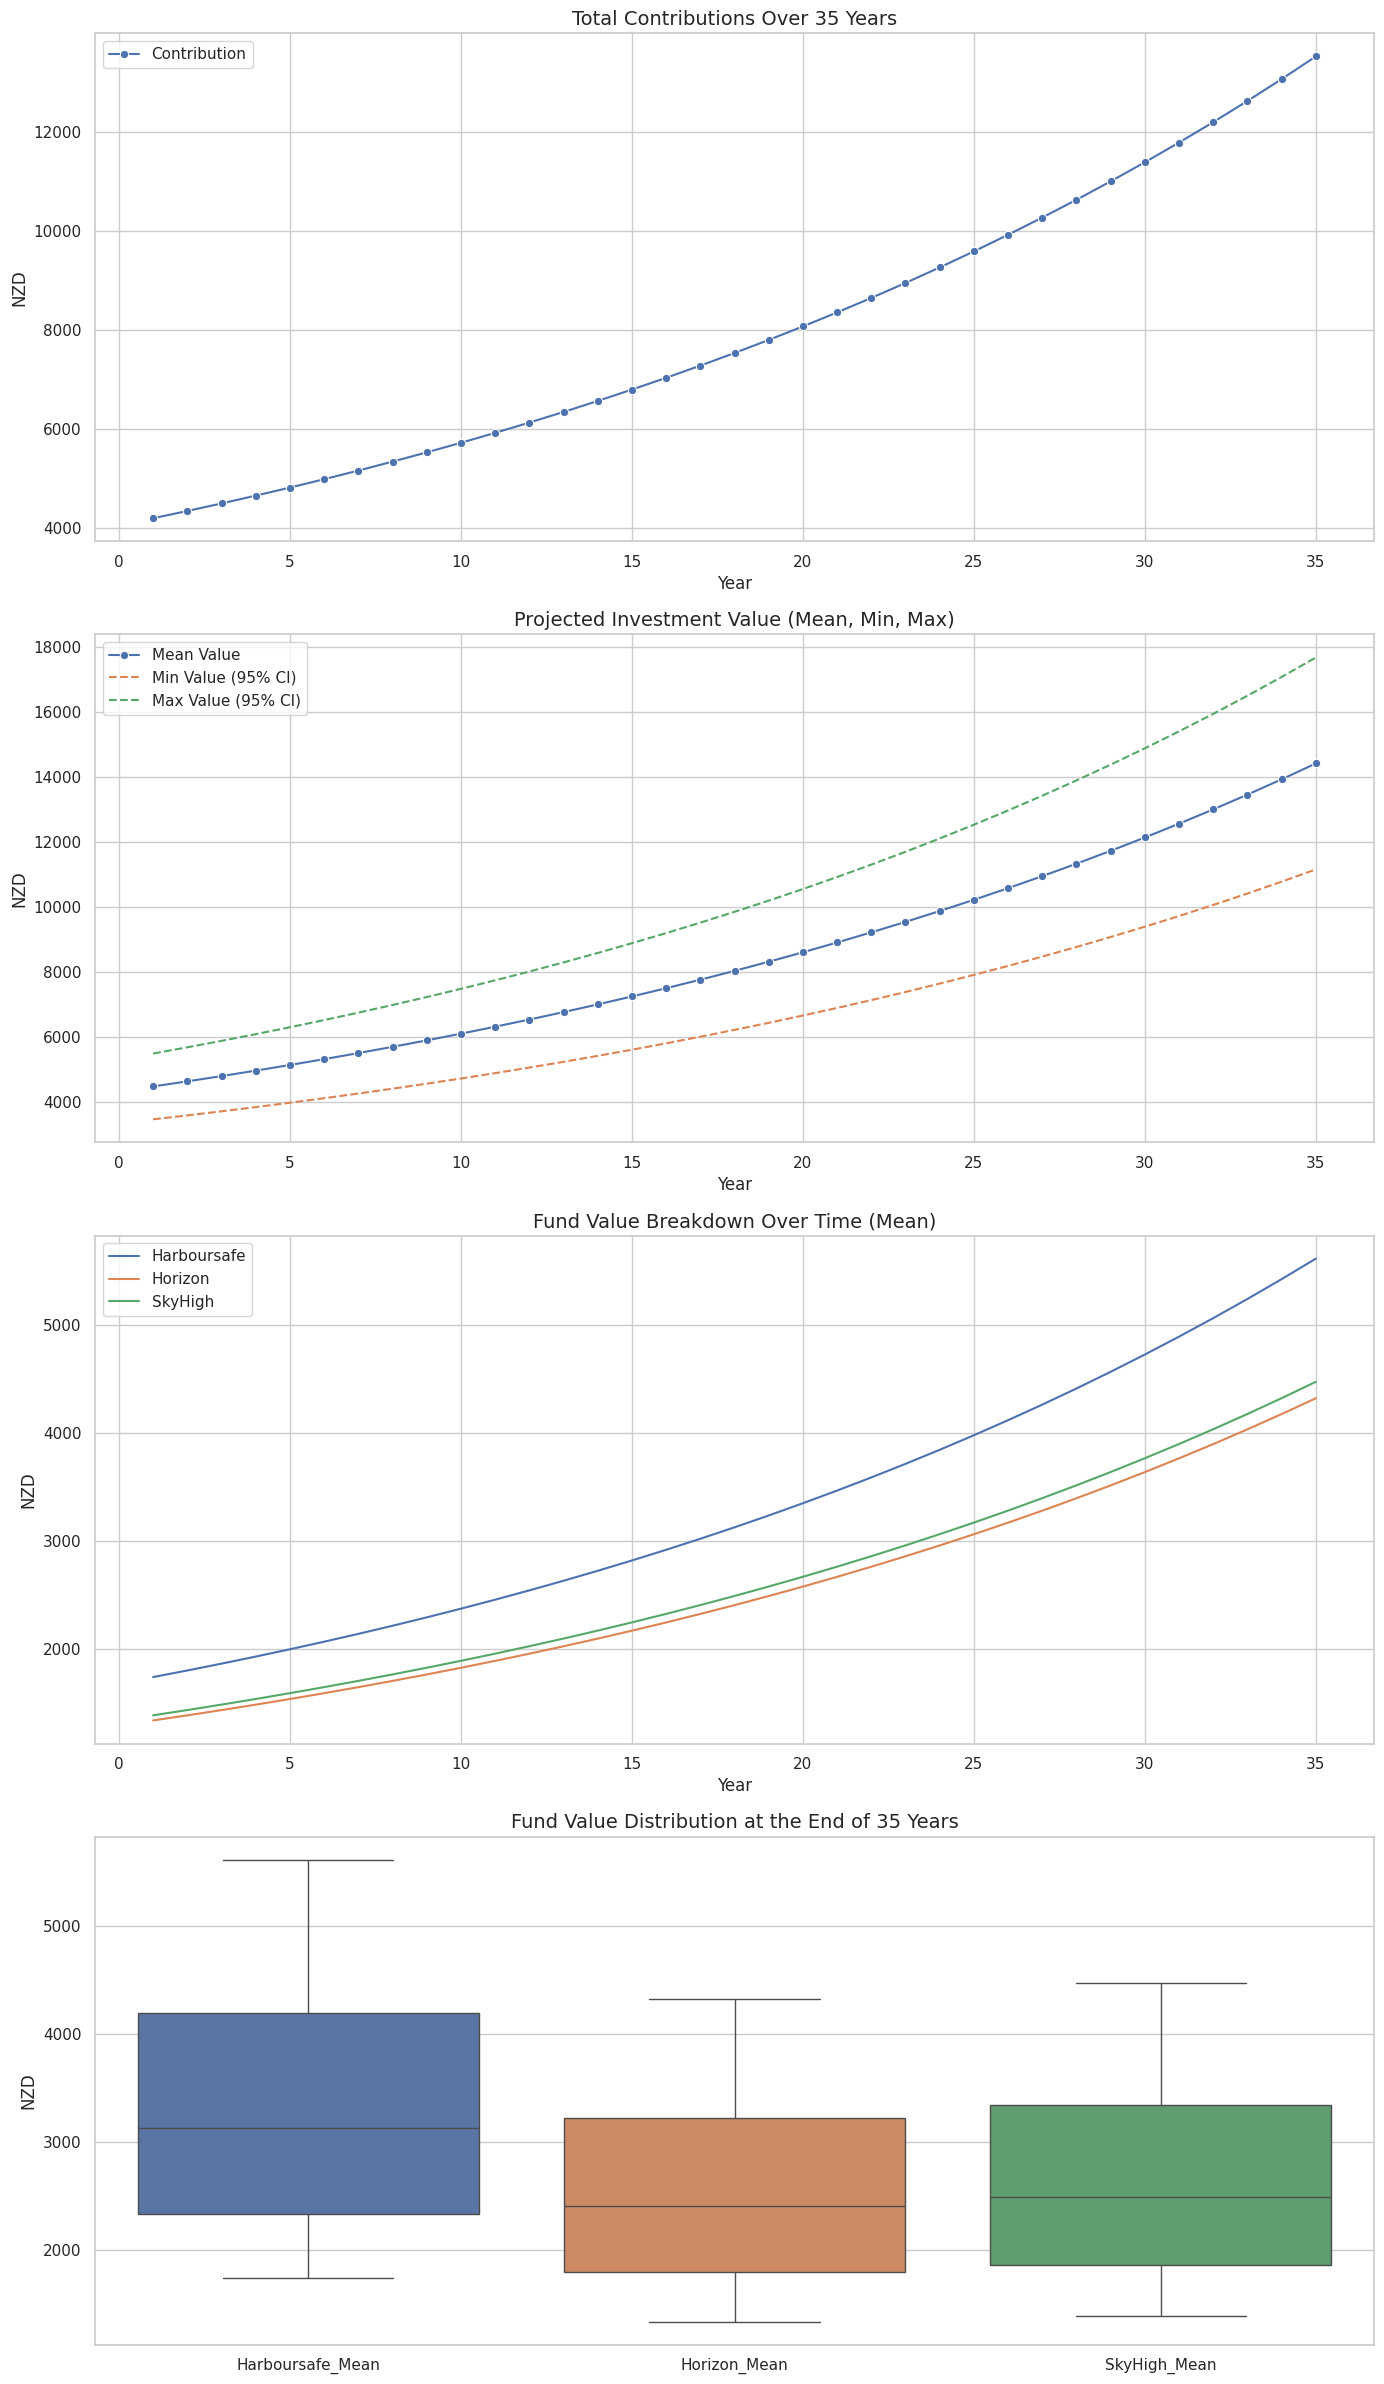

In [ ]:
df = df
summary_df = summary_df
summary_every_5_years = summary_every_5_years

# Prepare the data for plotting
df_filtered = df[df["Year"].notna()]  # Remove any NaNs

# Calculate total mean, min, and max values for each year
df_filtered['Total Mean Value'] = df_filtered[['Harboursafe_Mean', 'Horizon_Mean', 'SkyHigh_Mean']].sum(axis=1)
df_filtered['Total Min Value'] = df_filtered[['Harboursafe_Min', 'Horizon_Min', 'SkyHigh_Min']].sum(axis=1)
df_filtered['Total Max Value'] = df_filtered[['Harboursafe_Max', 'Horizon_Max', 'SkyHigh_Max']].sum(axis=1)

# Set style
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axs = plt.subplots(4, 1, figsize=(14, 24))  # Added an extra subplot

# Plot 1: Total Contributions Over Time
sns.lineplot(data=df_filtered, x="Year", y="Total_Contribution", ax=axs[0], marker="o", label="Contribution")
axs[0].set_title("Total Contributions Over 35 Years", fontsize=14)
axs[0].set_ylabel("NZD")
axs[0].legend()

# Plot 2: Investment Value Over Time (Mean)
sns.lineplot(data=df_filtered, x="Year", y="Total Mean Value", ax=axs[1], marker="o", label="Mean Value")
sns.lineplot(data=df_filtered, x="Year", y="Total Min Value", ax=axs[1], linestyle="--", label="Min Value (95% CI)")
sns.lineplot(data=df_filtered, x="Year", y="Total Max Value", ax=axs[1], linestyle="--", label="Max Value (95% CI)")
axs[1].set_title("Projected Investment Value (Mean, Min, Max)", fontsize=14)
axs[1].set_ylabel("NZD")
axs[1].legend()

# Plot 3: Breakdown by Fund (Mean Values)
sns.lineplot(data=df_filtered, x="Year", y="Harboursafe_Mean", ax=axs[2], label="Harboursafe")
sns.lineplot(data=df_filtered, x="Year", y="Horizon_Mean", ax=axs[2], label="Horizon")
sns.lineplot(data=df_filtered, x="Year", y="SkyHigh_Mean", ax=axs[2], label="SkyHigh")
axs[2].set_title("Fund Value Breakdown Over Time (Mean)", fontsize=14)
axs[2].set_ylabel("NZD")
axs[2].legend()

# Plot 4: Fund Value Distribution at the End of 35 Years (New!)
sns.boxplot(data=df_filtered[['Harboursafe_Mean', 'Horizon_Mean', 'SkyHigh_Mean']], ax=axs[3])
axs[3].set_title("Fund Value Distribution at the End of 35 Years", fontsize=14)
axs[3].set_ylabel("NZD")

plt.tight_layout()
plt.show()

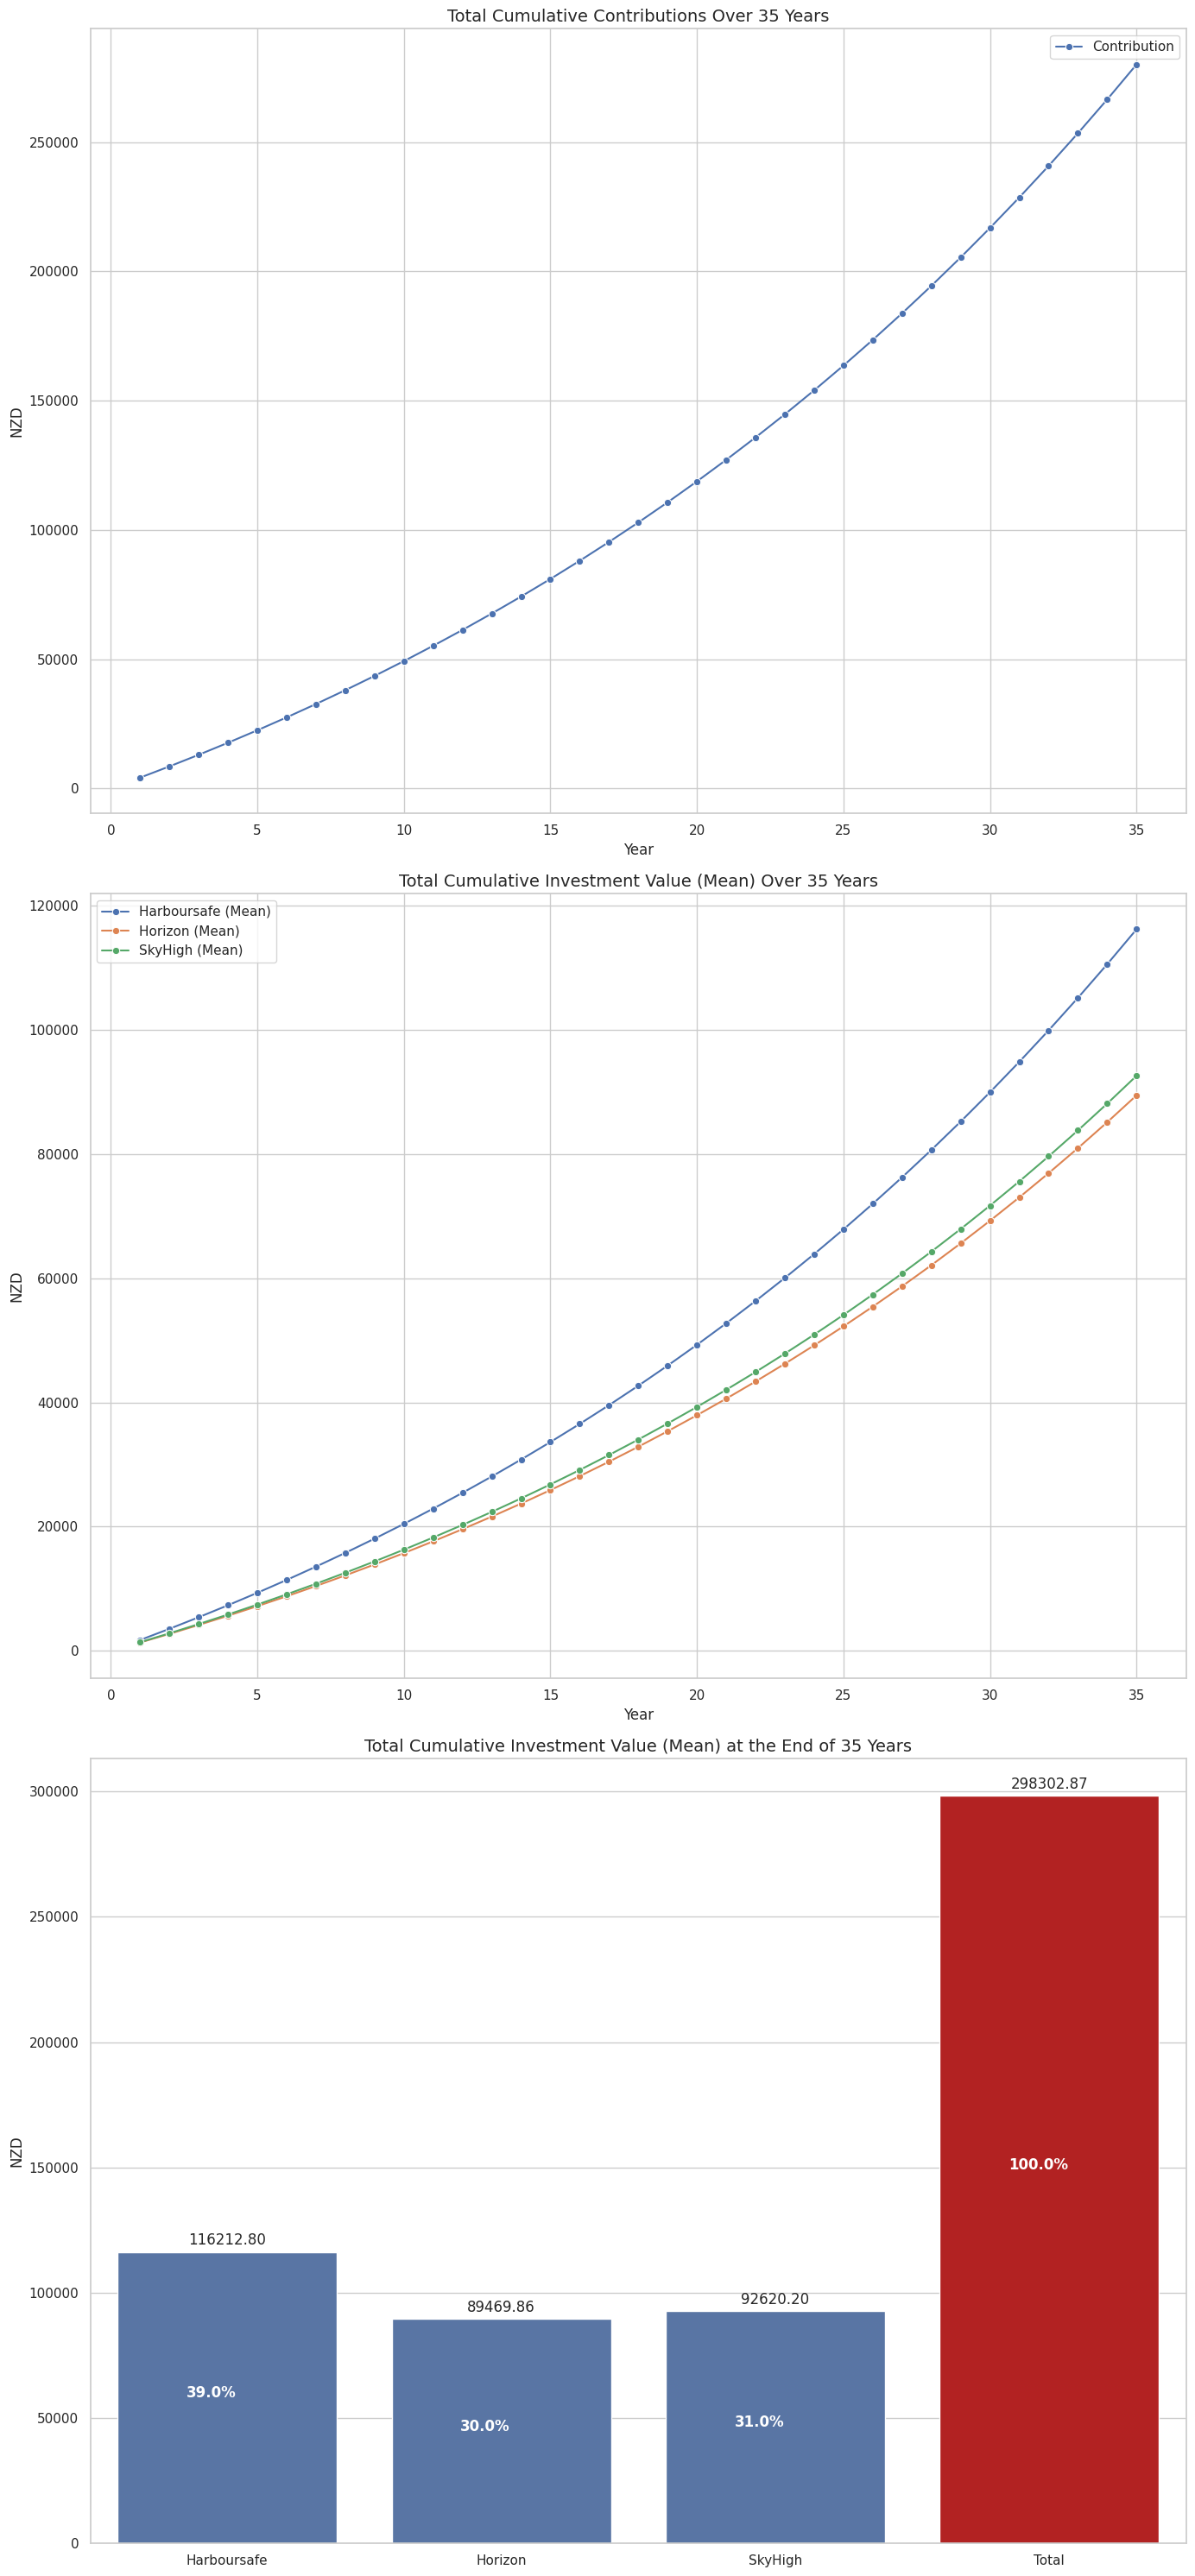

In [ ]:

# Assuming summary_df is already loaded

# Set style
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 30))  # Increased figure size to accommodate extra plots

# Plot 1: Total Contributions Over Time
sns.lineplot(data=summary_df, x="Year", y="Total_Contribution", ax=axs[0], marker="o", label="Contribution")
axs[0].set_title("Total Cumulative Contributions Over 35 Years", fontsize=14)
axs[0].set_ylabel("NZD")
axs[0].legend()

# Plot 2: Total Investment Value Over Time (Mean, Min, Max)
sns.lineplot(data=summary_df, x="Year", y="Harboursafe_Total_Mean", ax=axs[1], marker="o", label="Harboursafe (Mean)")
sns.lineplot(data=summary_df, x="Year", y="Horizon_Total_Mean", ax=axs[1], marker="o", label="Horizon (Mean)")
sns.lineplot(data=summary_df, x="Year", y="SkyHigh_Total_Mean", ax=axs[1], marker="o", label="SkyHigh (Mean)")
axs[1].set_title("Total Cumulative Investment Value (Mean) Over 35 Years", fontsize=14)
axs[1].set_ylabel("NZD")
axs[1].legend()

# Plot 3: Total Investment Value Distribution at the End of 35 Years
final_year_data = summary_df[summary_df["Year"] == 35]

# Calculate the total value for all funds
total_value = final_year_data[['Harboursafe_Total_Mean', 'Horizon_Total_Mean', 'SkyHigh_Total_Mean']].sum(axis=1).values[0]

# Add 'Total' to x-axis labels and total value to y-axis values
x_labels = ["Harboursafe", "Horizon", "SkyHigh", "Total"]
y_values = [final_year_data["Harboursafe_Total_Mean"].values[0],
           final_year_data["Horizon_Total_Mean"].values[0],
           final_year_data["SkyHigh_Total_Mean"].values[0],
           total_value]

ax = sns.barplot(
    x=x_labels,  # Updated x-axis labels
    y=y_values,  # Updated y-axis values
    ax=axs[2]
)

# Set color for the 'Total' bar to red
ax.patches[3].set_facecolor('firebrick')  # Index 3 for the 'Total' bar

axs[2].set_title("Total Cumulative Investment Value (Mean) at the End of 35 Years", fontsize=14)
axs[2].set_ylabel("NZD")

# Add data points on top of bars
for i, container in enumerate(ax.containers):
    ax.bar_label(container, fmt='%.2f', padding=3)

# Add percentage labels inside the bars
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * y_values[i] / total_value)
    x = p.get_x() + p.get_width() / 2 - 0.15  # Adjust position for better visibility
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), color='white', weight='bold', size=12)


plt.tight_layout()
plt.show()

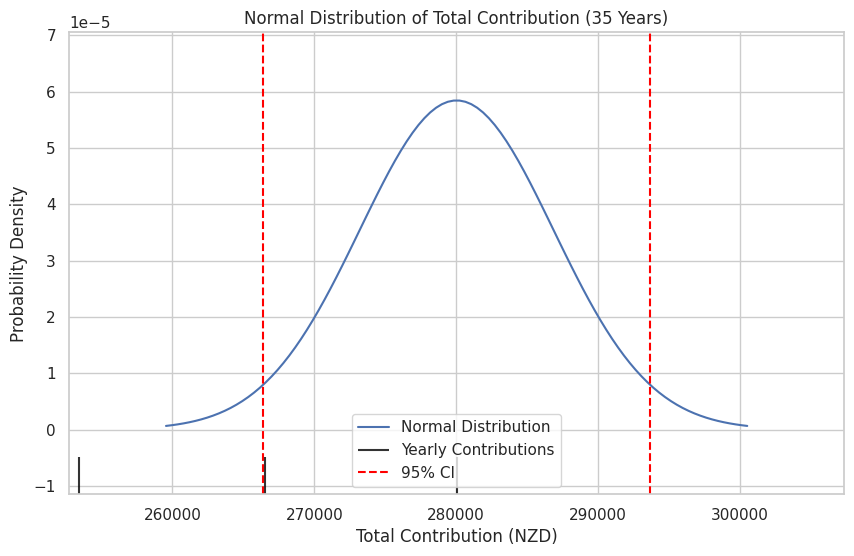

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd


# ... (Your existing code for initial inputs, fund details, and data preparation) ...


# Calculate the final total contribution
final_total_contribution = summary_df['Total_Contribution'].iloc[-1]

# Calculate weighted standard deviation considering individual fund volatilities
weighted_std_dev = 0
for fund, details in funds.items():
    # Get the final mean value for the fund
    final_fund_mean = summary_df[f"{fund}_Total_Mean"].iloc[-1]

    # Calculate the standard deviation for the fund (using volatility)
    fund_std_dev = final_fund_mean * details["volatility"]

    # Add the weighted variance to the total weighted variance
    weighted_std_dev += (details["contribution_pct"] ** 2) * (fund_std_dev ** 2)

# Take the square root to get the weighted standard deviation
weighted_std_dev = np.sqrt(weighted_std_dev)

# Generate x-values for the normal distribution curve
x = np.linspace(final_total_contribution - 3 * weighted_std_dev,
                final_total_contribution + 3 * weighted_std_dev, 100)

# Calculate y-values using the probability density function (pdf)
y = stats.norm.pdf(x, final_total_contribution, weighted_std_dev)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the normal distribution curve
plt.plot(x, y, label='Normal Distribution')

# Plot individual yearly contributions as data points (rug plot)
sns.rugplot(summary_df['Total_Contribution'], height=0.08, color='black', alpha=0.8, linewidth=1.5, label='Yearly Contributions')

# Add vertical lines for 95% confidence interval (2 std dev)
plt.axvline(final_total_contribution - 2 * weighted_std_dev, color='red', linestyle='--', label='95% CI')
plt.axvline(final_total_contribution + 2 * weighted_std_dev, color='red', linestyle='--')

# Customize the plot
plt.title('Normal Distribution of Total Contribution (35 Years)')
plt.xlabel('Total Contribution (NZD)')
plt.ylabel('Probability Density')
plt.legend()

# Center the distribution curve
plt.xlim([final_total_contribution - 4 * weighted_std_dev,
          final_total_contribution + 4 * weighted_std_dev])  # Adjust limits as needed

plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Initial setup
initial_salary = 70000
hike_rate = 0.035
std_dev = 0.07
contribution_rate = 0.06
years = 35
z_score = 1.96  # 95% confidence interval

# Initial fund allocations by year range
def get_fund_allocation(year):
    if year <= 10:
        return {"Harboursafe": 0.10, "Horizon": 0.20, "SkyHigh": 0.70}
    elif year <= 20:
        return {"Harboursafe": 0.20, "Horizon": 0.30, "SkyHigh": 0.50}
    elif year <= 30:
        return {"Harboursafe": 0.30, "Horizon": 0.35, "SkyHigh": 0.35}
    else:
        return {"Harboursafe": 0.50, "Horizon": 0.30, "SkyHigh": 0.20}

# Fund details (growth & volatility)
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075},
}

# Create a DataFrame to store yearly projections
columns = ["Year", "Salary", "Total_Contribution"]
for fund in funds:
    columns.extend([f"{fund}_Contribution", f"{fund}_Mean", f"{fund}_Min", f"{fund}_Max"])
records = []

salary = initial_salary

for year in range(1, years + 1):
    allocation = get_fund_allocation(year)
    total_contribution = salary * contribution_rate
    row = [year, salary, total_contribution]

    for fund in funds:
        pct = allocation[fund]
        details = funds[fund]
        contrib_amt = total_contribution * pct
        mean_growth = contrib_amt * (1 + details["growth_rate"])
        std_dev_amt = mean_growth * details["volatility"]
        min_val = mean_growth - z_score * std_dev_amt
        max_val = mean_growth + z_score * std_dev_amt
        row.extend([contrib_amt, mean_growth, min_val, max_val])

    records.append(row)
    salary *= (1 + hike_rate)

df = pd.DataFrame(records, columns=columns)

# Calculate cumulative values
summary_columns = ["Year", "Total_Contribution"]
for fund in funds:
    summary_columns.extend([f"{fund}_Total_Mean", f"{fund}_Total_Min", f"{fund}_Total_Max"])
summary_records = []

for i in range(years):
    year = df.loc[i, "Year"]
    total_contrib = df.loc[:i, "Total_Contribution"].sum()
    row = [year, total_contrib]
    for fund in funds:
        row.append(df.loc[:i, f"{fund}_Mean"].sum())
        row.append(df.loc[:i, f"{fund}_Min"].sum())
        row.append(df.loc[:i, f"{fund}_Max"].sum())
    summary_records.append(row)

summary_df = pd.DataFrame(summary_records, columns=summary_columns)

# Optional: Display every 5-year snapshot
summary_every_5_years = summary_df[summary_df["Year"] % 5 == 0]
summary_every_5_years


,Year,Total_Contribution,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max
4,5,22522.356678,2336.694505,2107.698444,2565.690567,4797.261972,3809.985458,5784.538486,17381.628766,10312.520347,24450.737185
9,10,49271.851275,5111.954570,4610.983022,5612.926118,10494.904321,8335.053012,12654.755631,38025.551221,22560.559539,53490.542903
14,15,81041.859690,11704.231316,10557.216647,12851.245985,20645.422010,16396.594161,24894.249860,55538.768360,32951.151268,78126.385452
19,20,118774.663616,19533.788131,17619.476894,21448.099367,32701.052865,25971.176185,39430.929544,76338.976524,45291.914772,107386.038277
24,25,163589.398112,33482.374242,30201.101567,36763.646918,49405.745148,39238.042797,59573.447499,93631.862198,55551.783842,131711.940554
29,30,216815.244564,50048.918951,45144.124894,54953.713008,69245.679413,54994.918590,83496.440236,114170.385698,67737.289834,160603.481561
34,35,280030.853502,82842.016087,74723.498511,90960.533664,89443.066469,71035.683389,107850.449548,128109.427469,76007.323317,180211.531620



Monte Carlo Simulation Summary:
                           Value
Median              3.305478e+06
Mean                3.422345e+06
10th Percentile     2.489392e+06
25th Percentile     2.847796e+06
75th Percentile     3.874274e+06
90th Percentile     4.499149e+06
Probability > 2.6M  8.591000e-01


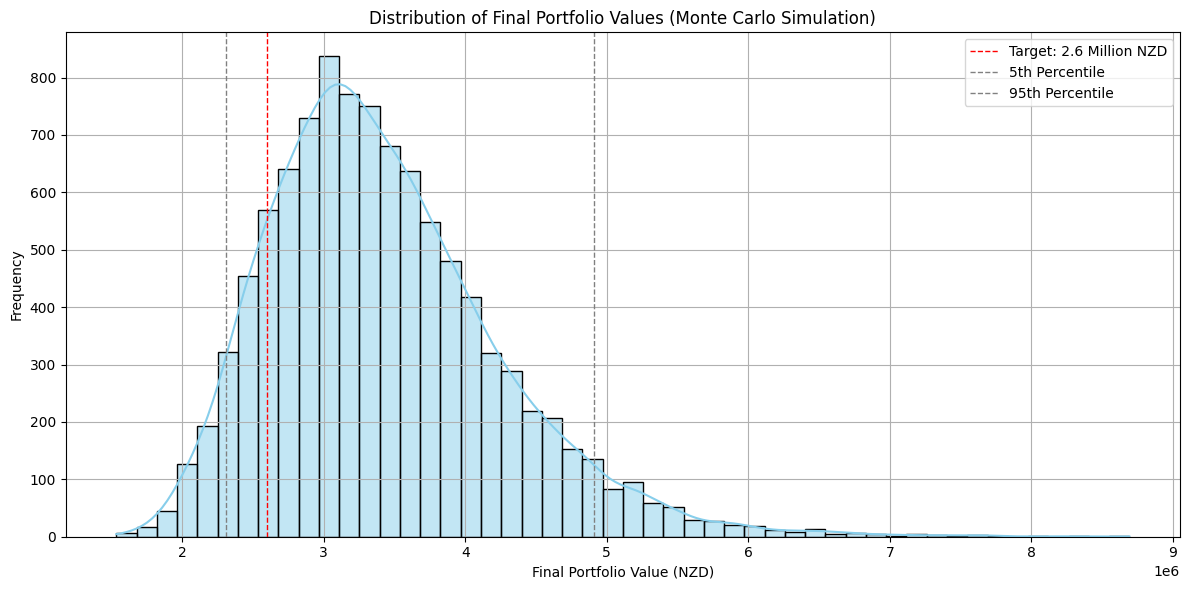

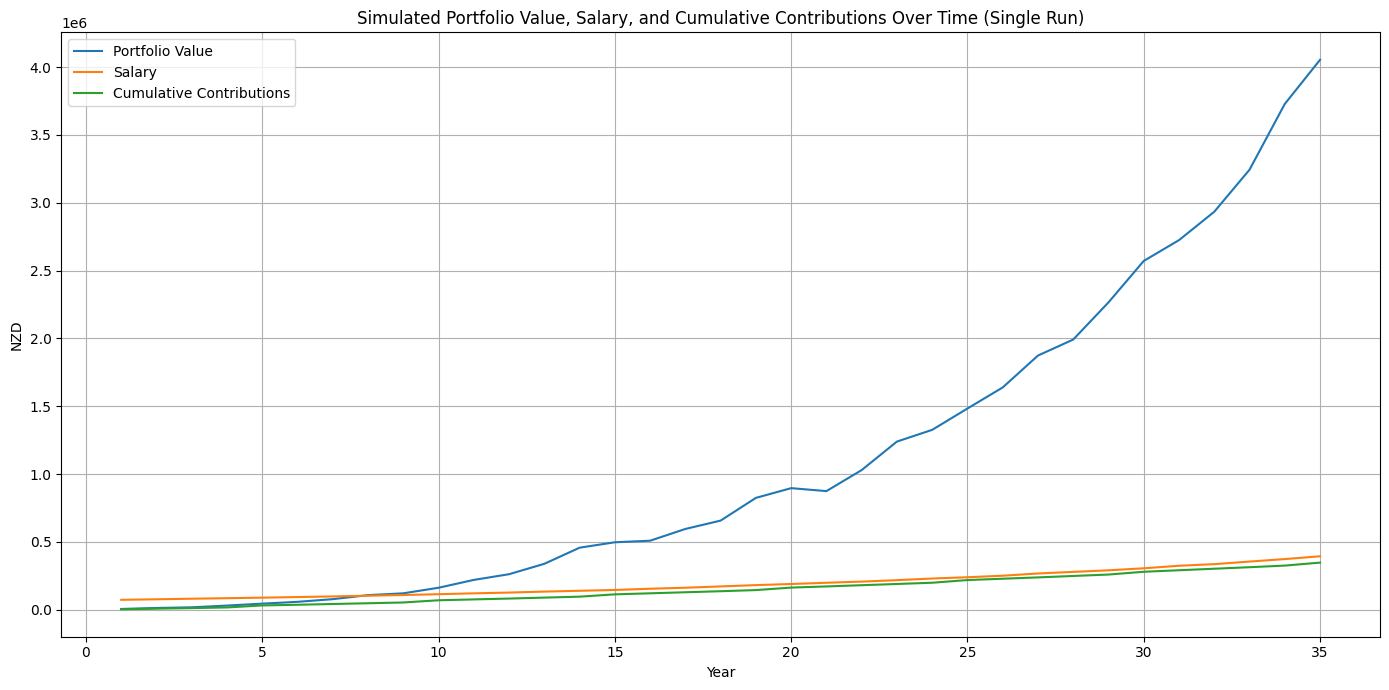

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulation Parameters
initial_salary = 70000
hike_rate_mean = 0.05
hike_rate_std = 0.007
contribution_start = 0.06
contribution_increase_years = 3
contribution_increase_amount = 0.01
contribution_max = 0.20
lump_sum_amount = 10000
lump_sum_frequency = 5
start_lump_sum_year = 5  # Year 5 corresponds to age 35
years = 35
simulations = 10000
bitcoin_duration = 7

# Growth Rate and Volatility Assumptions
growth_rates = {
    "Harboursafe": {"mean": 0.04, "std": 0.05},
    "Horizon": {"mean": 0.07, "std": 0.105},
    "SkyHigh": {"mean": 0.105, "std": 0.20},
    "Foreign_Equities": {"mean": 0.12 + 0.03, "std": np.sqrt(0.15**2 + 0.02**2)}, # Combined return & currency
    "Bitcoin": {"mean": 0.15, "std": 0.60},
}

# Allocation Strategy (by year)
def get_allocation(year):
    if year <= 7:
        return {"Harboursafe": 0.05, "Horizon": 0.10, "SkyHigh": 0.65, "Foreign_Equities": 0.15, "Bitcoin": 0.05}
    elif year <= 10:
        return {"Harboursafe": 0.10, "Horizon": 0.15, "SkyHigh": 60/100, "Foreign_Equities": 0.15}
    elif year <= 15:
        return {"Harboursafe": 0.15, "Horizon": 0.20, "SkyHigh": 50/100, "Foreign_Equities": 0.15}
    elif year <= 20:
        return {"Harboursafe": 0.20, "Horizon": 0.25, "SkyHigh": 50/100, "Foreign_Equities": 0.05}
    elif year <= 25:
        return {"Harboursafe": 0.30, "Horizon": 0.30, "SkyHigh": 30/100, "Foreign_Equities": 0.10}
    elif year <= 30:
        return {"Harboursafe": 0.40, "Horizon": 0.35, "SkyHigh": 25/100}
    else:
        return {"Harboursafe": 0.60, "Horizon": 0.20, "SkyHigh": 0.20}

# Run Monte Carlo Simulations
final_values = []

for sim in range(simulations):
    portfolio_value = 0
    salary = initial_salary
    contributions = 0

    for year in range(1, years + 1):
        # Calculate contribution rate for the current year
        contribution_rate = min(contribution_start + (year - 1) // contribution_increase_years * contribution_increase_amount, contribution_max)

        # Calculate annual contribution
        annual_contribution = salary * contribution_rate
        contributions += annual_contribution

        # Add lump sum investment if it's a lump sum year
        if year >= start_lump_sum_year and (year - start_lump_sum_year + 1) % lump_sum_frequency == 0:
            annual_contribution += lump_sum_amount

        # Get asset allocation for the current year
        allocation = get_allocation(year)
        yearly_growth = 0

        for asset, weight in allocation.items():
            if weight > 0:
                growth = np.random.normal(growth_rates[asset]["mean"], growth_rates[asset]["std"])
                if asset == "Foreign_Equities":
                    currency_growth = np.random.normal(growth_rates["Foreign_Equities"]["mean"] - 0.12, growth_rates["Foreign_Equities"]["std"]) # Simulate base USD return
                    currency_appreciation = np.random.normal(growth_rates["Foreign_Equities"]["mean"] - (growth_rates["Foreign_Equities"]["mean"] - 0.12), growth_rates["Foreign_Equities"]["std"]) # Simulate currency
                    growth = (1 + currency_growth) * (1 + currency_appreciation) - 1
                yearly_growth += portfolio_value * weight * growth + annual_contribution * weight * 0.5 # Approx. mid-year contribution

        portfolio_value += annual_contribution + yearly_growth
        salary *= (1 + np.random.normal(hike_rate_mean, hike_rate_std))

    final_values.append(portfolio_value)

final_values_np = np.array(final_values)

# Calculate Summary Statistics
summary_stats = {
    "Median": np.median(final_values_np),
    "Mean": np.mean(final_values_np),
    "10th Percentile": np.percentile(final_values_np, 10),
    "25th Percentile": np.percentile(final_values_np, 25),
    "75th Percentile": np.percentile(final_values_np, 75),
    "90th Percentile": np.percentile(final_values_np, 90),
    "Probability > 2.6M": np.mean(final_values_np > 2600000),
}

summary_df = pd.DataFrame(summary_stats, index=["Value"]).T
print("\nMonte Carlo Simulation Summary:")
print(summary_df)

# Visualization
plt.figure(figsize=(12, 6))
sns.histplot(final_values_np, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Final Portfolio Values (Monte Carlo Simulation)')
plt.xlabel('Final Portfolio Value (NZD)')
plt.ylabel('Frequency')
plt.axvline(2600000, color='red', linestyle='dashed', linewidth=1, label=f'Target: 2.6 Million NZD')
plt.axvline(np.percentile(final_values_np, 5), color='gray', linestyle='dashed', linewidth=1, label='5th Percentile')
plt.axvline(np.percentile(final_values_np, 95), color='gray', linestyle='dashed', linewidth=1, label='95th Percentile')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Series of a Single Simulation (Illustrative)
plt.figure(figsize=(14, 7))
portfolio_history = []
salary_history = []
contribution_history = []
portfolio_value_single = 0
salary_single = initial_salary

for year in range(1, years + 1):
    contribution_rate_single = min(contribution_start + (year - 1) // contribution_increase_years * contribution_increase_amount, contribution_max)
    annual_contribution_single = salary_single * contribution_rate_single
    if year >= start_lump_sum_year and (year - start_lump_sum_year + 1) % lump_sum_frequency == 0:
        annual_contribution_single += lump_sum_amount

    allocation_single = get_allocation(year)
    yearly_growth_single = 0
    for asset, weight in allocation_single.items():
        if weight > 0:
            growth = np.random.normal(growth_rates[asset]["mean"], growth_rates[asset]["std"])
            if asset == "Foreign_Equities":
                currency_growth = np.random.normal(growth_rates["Foreign_Equities"]["mean"] - 0.12, growth_rates["Foreign_Equities"]["std"])
                currency_appreciation = np.random.normal(growth_rates["Foreign_Equities"]["mean"] - (growth_rates["Foreign_Equities"]["mean"] - 0.12), growth_rates["Foreign_Equities"]["std"])
                growth = (1 + currency_growth) * (1 + currency_appreciation) - 1
            yearly_growth_single += portfolio_value_single * weight * growth + annual_contribution_single * weight * 0.5

    portfolio_value_single += annual_contribution_single + yearly_growth_single
    salary_single *= (1 + np.random.normal(hike_rate_mean, hike_rate_std))
    portfolio_history.append(portfolio_value_single)
    salary_history.append(salary_single)
    contribution_history.append(annual_contribution_single)

plt.plot(range(1, years + 1), portfolio_history, label='Portfolio Value')
plt.plot(range(1, years + 1), salary_history, label='Salary')
plt.plot(range(1, years + 1), np.cumsum([initial_salary * (min(contribution_start + (i) // contribution_increase_years * contribution_increase_amount, contribution_max)) + (lump_sum_amount if (i >= start_lump_sum_year -1) and (i - (start_lump_sum_year -1)) % lump_sum_frequency == 0 else 0) for i in range(years)]), label='Cumulative Contributions')
plt.title('Simulated Portfolio Value, Salary, and Cumulative Contributions Over Time (Single Run)')
plt.xlabel('Year')
plt.ylabel('NZD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Monte Carlo Simulation for 35-Year Retirement Corpus Projection with Tax and Fund Allocation With Tax reduction:

Description:
This Python code models the projected retirement corpus for an individual earning an initial salary of $70,000 at age 30, planning to retire at age 65. It incorporates annual salary hikes, fixed contribution rates, average tax deductions, and diversified investments across three funds with different risk-return profiles.

Using a Monte Carlo simulation (10,000 runs), the code generates possible outcomes for fund growth over 35 years. It then computes key financial statistics including the mean, median, and 95% confidence interval (5th and 95th percentiles) of the final corpus, offering a robust understanding of potential retirement outcomes under uncertainty.

The results help estimate retirement savings with statistical confidence, accounting for market volatility and personal contribution behavior.

{'Harboursafe': array([174361.43813497, 120230.493947  , 163851.75586024, ...,
       138258.98848782, 160726.50961051, 193450.26184988]), 'Horizon': array([332138.77359157, 357250.34924347, 224369.11014554, ...,
       300196.66590337, 134613.41010499, 209067.09634388]), 'SkyHigh': array([370326.50418984, 227078.38603799, 418501.4817444 , ...,
       215695.89591716, 421104.69727267,  88305.60869824])}


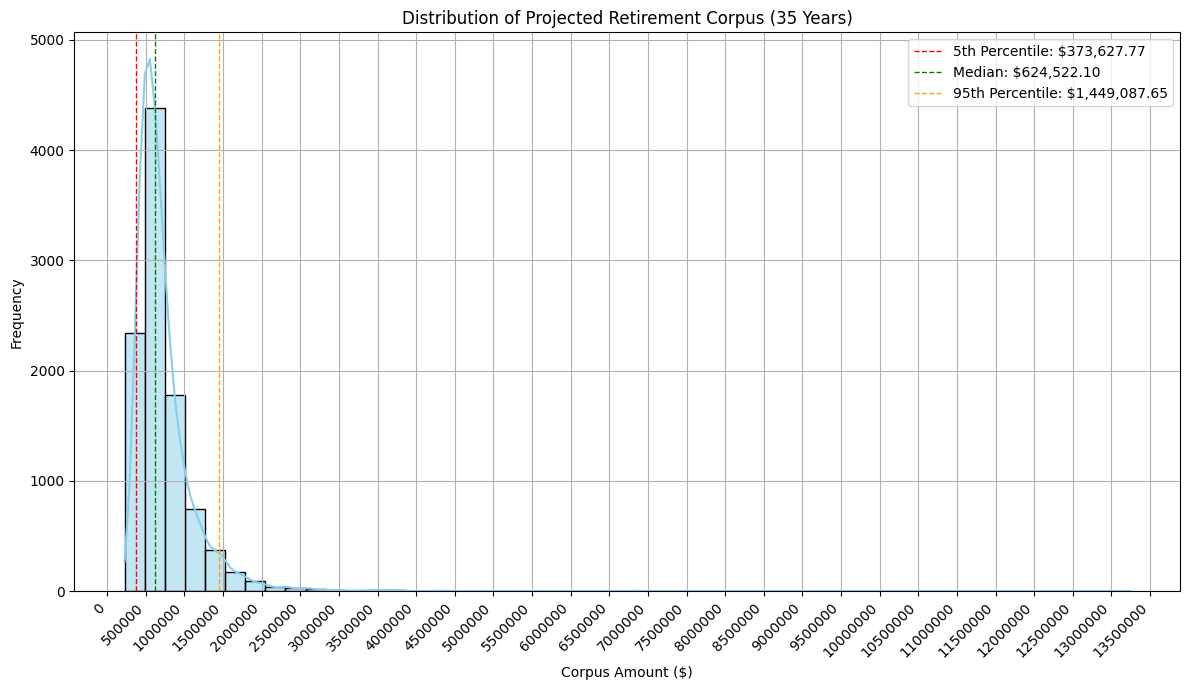

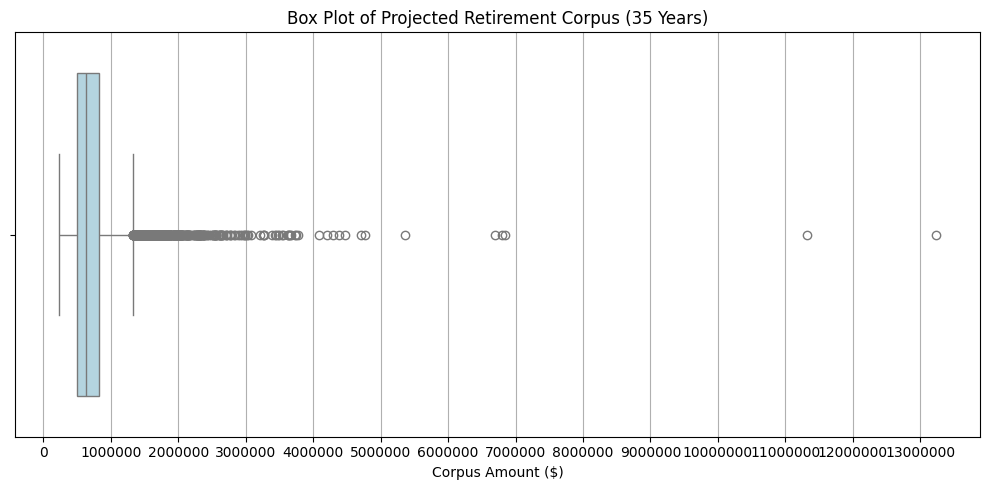

         Statistic Corpus Value ($)
0             Mean      $732,349.12
1           Median      $624,522.10
2   5th Percentile      $373,627.77
3  95th Percentile    $1,449,087.65


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set random seed for reproducibility
np.random.seed(42)

# Initial inputs
initial_salary = 70000
hike_rate = 0.035
contribution_rate = 0.06
years = 35
tax_rate = 0.275  # 27.5%

# Fund details
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05, "contribution_pct": 0.4},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105, "contribution_pct": 0.3},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075, "contribution_pct": 0.3},
}

# Initialize fund balances for 50,000 simulations
fund_balances = {fund: np.zeros(10000) for fund in funds}

salary = initial_salary

# Simulate cumulative compounding over the years
for year in range(1, years + 1):
    gross_contribution = salary * contribution_rate
    net_contribution = gross_contribution * (1 - tax_rate)

    for fund, details in funds.items():
        contrib = net_contribution * details["contribution_pct"]
        annual_returns = np.random.normal(
            loc=details["growth_rate"],
            scale=details["volatility"],
            size=10000
        )
        # Add contribution, then grow the total fund
        fund_balances[fund] = (fund_balances[fund] + contrib) * (1 + annual_returns)

    salary *= (1 + hike_rate)

print(fund_balances)

# Combine all fund balances to get total corpus
total_corpus = sum(fund_balances.values())

# Calculate statistics
final_mean = np.mean(total_corpus)
final_median = np.median(total_corpus)
final_5th = np.percentile(total_corpus, 5)
final_95th = np.percentile(total_corpus, 95)

# Prepare summary DataFrame
summary_stats = pd.DataFrame({
    "Statistic": ["Mean", "Median", "5th Percentile", "95th Percentile"],
    "Corpus Value ($)": [final_mean, final_median, final_5th, final_95th]
})
summary_stats["Corpus Value ($)"] = summary_stats["Corpus Value ($)"].apply(lambda x: f"${x:,.2f}")

# Plot Histogram of Final Corpus
plt.figure(figsize=(12, 7))
sns.histplot(total_corpus, bins=50, kde=True, color='skyblue')
plt.axvline(final_5th, color='red', linestyle='dashed', linewidth=1, label=f"5th Percentile: ${final_5th:,.2f}")
plt.axvline(final_median, color='green', linestyle='dashed', linewidth=1, label=f"Median: ${final_median:,.2f}")
plt.axvline(final_95th, color='orange', linestyle='dashed', linewidth=1, label=f"95th Percentile: ${final_95th:,.2f}")
plt.title("Distribution of Projected Retirement Corpus (35 Years)")
plt.xlabel("Corpus Amount ($)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

# Format x-axis to show labels every $50,000
plt.ticklabel_format(style='plain', axis='x')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500000))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Box Plot of Final Corpus
plt.figure(figsize=(10, 5))
sns.boxplot(x=total_corpus, color="lightblue")
plt.title("Box Plot of Projected Retirement Corpus (35 Years)")
plt.xlabel("Corpus Amount ($)")
plt.grid(True, axis='x')

# Format x-axis to show labels every $50,000
plt.ticklabel_format(style='plain', axis='x')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1000000))
plt.tight_layout()
plt.show()

print(summary_stats)

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Prevent scientific notation and set float display format
pd.options.display.float_format = '{:,.2f}'.format

# Initial inputs
initial_salary = 70000
hike_rate = 0.035
std_dev = 0.07
contribution_rate = 0.06
years = 35
z_score = 1.96  # For 95% confidence level
num_simulations = 5000  # Number of Monte Carlo simulations

# Fund details
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05, "contribution_pct": 0.4},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105, "contribution_pct": 0.3},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075, "contribution_pct": 0.3},
}

# Create a DataFrame to store yearly data for each simulation
columns = ["Year", "Salary", "Net_Salary", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    columns.extend([f"{fund}_Sim_{i}" for i in range(num_simulations)])

# Function to calculate progressive tax with inflation
def calculate_tax(salary, base_slabs, year, inflation_rate=0.025):
    adjusted_slabs = [(bracket[0] * ((1 + inflation_rate) ** (year - 1)),
                       bracket[1] * ((1 + inflation_rate) ** (year - 1)),
                       rate)
                      for (bracket, rate) in zip(base_slabs, [0.105, 0.175, 0.30, 0.33])]
    tax = 0
    for lower, upper, rate in adjusted_slabs:
        if salary > lower:
            taxable_income = min(salary, upper) - lower
            tax += taxable_income * rate
        else:
            break
    return tax

# NZ tax brackets
nz_tax_brackets = [
    (0, 14000),
    (14001, 48000),
    (48001, 70000),
    (70001, 180000),
    (180001, float('inf'))
]

records = []
cumulative_tax = 0
cumulative_fundvalue = 0

# Simulate each year
for year in range(1, years + 1):
    salary = initial_salary * (1 + hike_rate) ** (year - 1)
    tax = calculate_tax(salary, nz_tax_brackets, year)
    net_salary = salary - tax
    cumulative_tax += tax
    total_contribution = net_salary * contribution_rate
    cumulative_fundvalue += total_contribution
    row = [year, salary, net_salary, total_contribution, cumulative_tax, cumulative_fundvalue]

    # Fund simulation
    for sim in range(num_simulations):
        for fund, details in funds.items():
            contrib_amt = total_contribution * details["contribution_pct"]
            growth_rate = np.random.normal(details["growth_rate"], details["volatility"])
            fund_value = contrib_amt * (1 + growth_rate)
            row.append(fund_value)
    records.append(row)

# Create raw simulation DataFrame
df = pd.DataFrame(records, columns=columns)

# Summary stats
summary_columns = ["Year", "Salary", "Net_Salary", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    summary_columns.extend([
        f"{fund}_Mean",
        f"{fund}_Min",
        f"{fund}_Max",
        f"{fund}_StdDev"
    ])
summary_records = []

for year in range(1, years + 1):
    row = [year, df.loc[year - 1, "Salary"], df.loc[year - 1, "Net_Salary"],
           df.loc[year - 1, "Total_Contribution"], df.loc[year - 1, "Cumulative_Tax"],
           df.loc[year - 1, "Cumulative_FundValue"]]

    for fund in funds:
        sim_values = [df.loc[year - 1, f"{fund}_Sim_{i}"] for i in range(num_simulations)]
        row.extend([
            np.mean(sim_values),
            np.min(sim_values),
            np.max(sim_values),
            np.std(sim_values)
        ])
    summary_records.append(row)

summary_df = pd.DataFrame(summary_records, columns=summary_columns)
summary_df = summary_df.round(2)

# Cumulative Summary
cumulative_summary_columns = ["Year", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    cumulative_summary_columns.extend([
        f"{fund}_Total_Mean",
        f"{fund}_Total_Min",
        f"{fund}_Total_Max",
        f"{fund}_Total_StdDev"
    ])

cumulative_summary_records = []
for i in range(years):
    year = summary_df.loc[i, "Year"]
    total_contrib = summary_df.loc[:i, "Total_Contribution"].sum()
    cumulative_tax_value = summary_df.loc[:i, "Cumulative_Tax"].sum()
    cumulative_fund_value = summary_df.loc[:i, "Cumulative_FundValue"].sum()
    row = [year, total_contrib, cumulative_tax_value, cumulative_fund_value]
    for fund in funds:
        row.extend([
            summary_df.loc[:i, f"{fund}_Mean"].sum(),
            summary_df.loc[:i, f"{fund}_Min"].sum(),
            summary_df.loc[:i, f"{fund}_Max"].sum(),
            summary_df.loc[:i, f"{fund}_StdDev"].sum()
        ])
    cumulative_summary_records.append(row)

cumulative_summary_df = pd.DataFrame(cumulative_summary_records, columns=cumulative_summary_columns)
cumulative_summary_df = cumulative_summary_df.round(2)

# Summary at every 5-year interval
summary_every_5_years = cumulative_summary_df[cumulative_summary_df["Year"] % 5 == 0]

# Display DataFrames
from IPython.display import display

print("🔹 Summary of Mean, Min, Max, and StdDev for each year:")
display(summary_df)

print("\n🔹 Cumulative Summary of Mean, Min, Max, and StdDev for each year:")
display(cumulative_summary_df)

print("\n🔹 Every 5-Year Cumulative Summary:")
display(summary_every_5_years)


🔹 Summary of Mean, Min, Max, and StdDev for each year:


,Year,Salary,Net_Salary,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Mean,Harboursafe_Min,Harboursafe_Max,Harboursafe_StdDev,Horizon_Mean,Horizon_Min,Horizon_Max,Horizon_StdDev,SkyHigh_Mean,SkyHigh_Min,SkyHigh_Max,SkyHigh_StdDev
0,1,"70,000.00","55,980.48","3,358.83","14,019.52","3,358.83","1,194.46",429.09,"1,893.03",201.14,"1,190.94",251.08,"1,801.63",200.88,"1,196.64",339.75,"1,757.84",201.02
1,2,"72,450.00","57,849.33","3,470.96","28,620.20","6,829.79","1,229.66",392.60,"1,842.34",205.76,"1,232.47",321.21,"1,822.56",207.56,"1,231.95",372.89,"1,873.15",208.07
2,3,"74,985.75","59,780.97","3,586.86","43,824.98","10,416.65","1,272.53",493.29,"1,841.15",213.09,"1,277.69",504.11,"1,876.11",212.42,"1,273.18",357.28,"1,873.70",215.07
3,4,"77,610.25","61,777.90","3,706.67","59,657.33","14,123.32","1,313.69",403.60,"2,001.16",222.87,"1,315.33",494.49,"2,093.42",222.74,"1,316.84",434.56,"1,969.84",223.15
4,5,"80,326.61","63,842.34","3,830.54","76,141.60","17,953.86","1,359.05",586.06,"2,061.78",228.72,"1,360.91",481.52,"2,030.19",227.80,"1,357.70",488.26,"2,050.05",229.59
5,6,"83,138.04","65,976.59","3,958.60","93,303.05","21,912.46","1,407.51",571.37,"2,255.85",235.27,"1,407.16",594.76,"2,041.84",235.03,"1,406.41",536.44,"2,287.53",236.48
6,7,"86,047.87","68,183.02","4,090.98","111,167.90","26,003.44","1,454.88",529.89,"2,481.43",241.43,"1,451.70",402.12,"2,024.05",244.58,"1,452.67",571.28,"2,086.36",241.31
7,8,"89,059.55","70,464.12","4,227.85","129,763.33","30,231.28","1,498.87",585.69,"2,300.10",250.85,"1,503.64",490.79,"2,286.23",252.49,"1,501.36",496.17,"2,341.10",254.02
8,9,"92,176.63","72,822.42","4,369.35","149,117.54","34,600.63","1,552.32",505.94,"2,269.00",261.74,"1,549.29",374.99,"2,464.80",265.01,"1,555.55",518.19,"2,402.85",260.71
9,10,"95,402.81","75,260.57","4,515.63","169,259.79","39,116.26","1,602.84",491.64,"2,516.67",271.27,"1,604.59",343.91,"2,446.95",270.07,"1,606.07",639.57,"2,388.90",270.39



🔹 Cumulative Summary of Mean, Min, Max, and StdDev for each year:


,Year,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Harboursafe_Total_StdDev,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,Horizon_Total_StdDev,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max,SkyHigh_Total_StdDev
0,1,"3,358.83","14,019.52","3,358.83","1,194.46",429.09,"1,893.03",201.14,"1,190.94",251.08,"1,801.63",200.88,"1,196.64",339.75,"1,757.84",201.02
1,2,"6,829.79","42,639.72","10,188.62","2,424.12",821.69,"3,735.37",406.90,"2,423.41",572.29,"3,624.19",408.44,"2,428.59",712.64,"3,630.99",409.09
2,3,"10,416.65","86,464.70","20,605.27","3,696.65","1,314.98","5,576.52",619.99,"3,701.10","1,076.40","5,500.30",620.86,"3,701.77","1,069.92","5,504.69",624.16
3,4,"14,123.32","146,122.03","34,728.59","5,010.34","1,718.58","7,577.68",842.86,"5,016.43","1,570.89","7,593.72",843.60,"5,018.61","1,504.48","7,474.53",847.31
4,5,"17,953.86","222,263.63","52,682.45","6,369.39","2,304.64","9,639.46","1,071.58","6,377.34","2,052.41","9,623.91","1,071.40","6,376.31","1,992.74","9,524.58","1,076.90"
5,6,"21,912.46","315,566.68","74,594.91","7,776.90","2,876.01","11,895.31","1,306.85","7,784.50","2,647.17","11,665.75","1,306.43","7,782.72","2,529.18","11,812.11","1,313.38"
6,7,"26,003.44","426,734.58","100,598.35","9,231.78","3,405.90","14,376.74","1,548.28","9,236.20","3,049.29","13,689.80","1,551.01","9,235.39","3,100.46","13,898.47","1,554.69"
7,8,"30,231.29","556,497.91","130,829.63","10,730.65","3,991.59","16,676.84","1,799.13","10,739.84","3,540.08","15,976.03","1,803.50","10,736.75","3,596.63","16,239.57","1,808.71"
8,9,"34,600.64","705,615.45","165,430.26","12,282.97","4,497.53","18,945.84","2,060.87","12,289.13","3,915.07","18,440.83","2,068.51","12,292.30","4,114.82","18,642.42","2,069.42"
9,10,"39,116.27","874,875.24","204,546.52","13,885.81","4,989.17","21,462.51","2,332.14","13,893.72","4,258.98","20,887.78","2,338.58","13,898.37","4,754.39","21,031.32","2,339.81"



🔹 Every 5-Year Cumulative Summary:


,Year,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Harboursafe_Total_StdDev,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,Horizon_Total_StdDev,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max,SkyHigh_Total_StdDev
4,5,"17,953.86","222,263.63","52,682.45","6,369.39","2,304.64","9,639.46","1,071.58","6,377.34","2,052.41","9,623.91","1,071.40","6,376.31","1,992.74","9,524.58","1,076.90"
9,10,"39,116.27","874,875.24","204,546.52","13,885.81","4,989.17","21,462.51","2,332.14","13,893.72","4,258.98","20,887.78","2,338.58","13,898.37","4,754.39","21,031.32","2,339.81"
14,15,"64,068.21","2,053,078.07","473,338.88","22,751.52","8,324.98","35,063.17","3,812.72","22,752.38","7,060.51","34,610.03","3,830.70","22,761.07","7,910.18","34,129.23","3,824.07"
19,20,"93,496.97","3,871,893.03","880,022.91","33,202.51","11,393.17","50,909.82","5,579.14","33,207.77","9,984.76","50,885.39","5,587.23","33,221.37","11,459.41","49,831.74","5,583.24"
24,25,"128,215.68","6,470,080.65","1,449,367.38","45,527.40","15,241.96","69,481.77","7,652.37","45,545.19","13,778.96","69,949.30","7,660.63","45,553.52","15,758.02","68,583.24","7,649.33"
29,30,"169,186.52","10,014,879.43","2,210,643.77","60,078.62","20,712.68","91,405.64","10,088.58","60,097.58","18,358.70","91,870.50","10,100.55","60,090.80","20,378.76","90,588.26","10,108.50"
34,35,"217,548.21","14,707,670.70","3,198,452.16","77,221.45","26,713.16","118,070.26","12,982.28","77,252.53","24,419.31","118,410.76","12,999.32","77,268.45","26,034.98","116,743.55","13,018.62"


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display

# Configure display to show float numbers in readable format
pd.options.display.float_format = '{:,.2f}'.format

# Input Parameters
initial_salary = 70000                  # Starting salary
hike_rate = 0.035                       # Annual salary hike rate
std_dev = 0.07                          # Standard deviation of salary (not used in current version)
contribution_rate = 0.06                # % of net salary contributed to funds
years = 35                              # Total number of working years
z_score = 1.96                          # Z-score for 95% confidence
num_simulations = 5000                  # Number of Monte Carlo simulations

# Fund Allocation Details
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05, "contribution_pct": 0.4},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105, "contribution_pct": 0.3},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075, "contribution_pct": 0.3},
}

# NZ progressive tax brackets
nz_tax_brackets = [
    (0, 14000),
    (14001, 48000),
    (48001, 70000),
    (70001, 180000),
    (180001, float('inf'))
]

# Function to calculate progressive tax with inflation adjustments over time
def calculate_tax(salary, base_slabs, year, inflation_rate=0.025):
    adjusted_slabs = [(bracket[0] * ((1 + inflation_rate) ** (year - 1)),
                       bracket[1] * ((1 + inflation_rate) ** (year - 1)),
                       rate)
                      for (bracket, rate) in zip(base_slabs, [0.105, 0.175, 0.30, 0.33])]
    tax = 0
    for lower, upper, rate in adjusted_slabs:
        if salary > lower:
            taxable_income = min(salary, upper) - lower
            tax += taxable_income * rate
        else:
            break
    return tax

# Function to simulate one year's contribution and fund value across all simulations
def simulate_yearly_contributions_and_funds(year, salary, net_salary, funds, total_contribution, num_simulations):
    fund_values = {fund: [] for fund in funds}
    fund_sims = []

    # For each simulation, calculate fund value based on random returns
    for sim in range(num_simulations):
        for fund, details in funds.items():
            contrib_amt = total_contribution * details["contribution_pct"]
            growth_rate = np.random.normal(details["growth_rate"], details["volatility"])
            fund_value = contrib_amt * (1 + growth_rate)
            fund_values[fund].append(fund_value)
            fund_sims.append(fund_value)

    # Calculate the average of each fund to accumulate for cumulative_fundvalue
    fund_means = {fund: np.mean(values) for fund, values in fund_values.items()}
    total_fund_mean = sum(fund_means.values())
    return fund_sims, total_fund_mean

# Main simulation loop
records = []
cumulative_tax = 0
cumulative_fundvalue = 0

for year in range(1, years + 1):
    salary = initial_salary * (1 + hike_rate) ** (year - 1)
    tax = calculate_tax(salary, nz_tax_brackets, year)
    net_salary = salary - tax
    cumulative_tax += tax
    total_contribution = net_salary * contribution_rate

    # Simulate fund growth and contribution for the year
    fund_sims, total_fund_mean = simulate_yearly_contributions_and_funds(
        year, salary, net_salary, funds, total_contribution, num_simulations
    )
    cumulative_fundvalue += total_fund_mean  # Accumulate average values over the years
    row = [year, salary, net_salary, total_contribution, cumulative_tax, cumulative_fundvalue] + fund_sims
    records.append(row)

# Construct simulation dataframe
columns = ["Year", "Salary", "Net_Salary", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    columns.extend([f"{fund}_Sim_{i}" for i in range(num_simulations)])
df = pd.DataFrame(records, columns=columns)

# Per-year summary statistics
summary_columns = ["Year", "Salary", "Net_Salary", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    summary_columns.extend([
        f"{fund}_Mean", f"{fund}_Min", f"{fund}_Max", f"{fund}_StdDev"
    ])
summary_records = []

for i in range(years):
    year_data = df.iloc[i]
    row = [
        year_data["Year"],
        year_data["Salary"],
        year_data["Net_Salary"],
        year_data["Total_Contribution"],
        year_data["Cumulative_Tax"],
        year_data["Cumulative_FundValue"]
    ]
    for fund in funds:
        sim_values = [year_data[f"{fund}_Sim_{j}"] for j in range(num_simulations)]
        row.extend([
            np.mean(sim_values),
            np.min(sim_values),
            np.max(sim_values),
            np.std(sim_values)
        ])
    summary_records.append(row)

summary_df = pd.DataFrame(summary_records, columns=summary_columns).round(2)

# Cumulative summary over time
cumulative_summary_columns = ["Year", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    cumulative_summary_columns.extend([
        f"{fund}_Total_Mean", f"{fund}_Total_Min", f"{fund}_Total_Max", f"{fund}_Total_StdDev"
    ])

cumulative_summary_records = []
for i in range(years):
    year = summary_df.loc[i, "Year"]
    total_contrib = summary_df.loc[:i, "Total_Contribution"].sum()
    cumulative_tax_value = summary_df.loc[:i, "Cumulative_Tax"].sum()
    cumulative_fund_value = summary_df.loc[:i, "Cumulative_FundValue"].sum()
    row = [year, total_contrib, cumulative_tax_value, cumulative_fund_value]

    for fund in funds:
        row.extend([
            summary_df.loc[:i, f"{fund}_Mean"].sum(),
            summary_df.loc[:i, f"{fund}_Min"].sum(),
            summary_df.loc[:i, f"{fund}_Max"].sum(),
            summary_df.loc[:i, f"{fund}_StdDev"].sum()
        ])
    cumulative_summary_records.append(row)

cumulative_summary_df = pd.DataFrame(cumulative_summary_records, columns=cumulative_summary_columns).round(2)

# Every 5-Year Interval Summary
summary_every_5_years = cumulative_summary_df[cumulative_summary_df["Year"] % 5 == 0]

# Display Results
print("🔹 Summary of Mean, Min, Max, and StdDev for each year:")
display(summary_df)

print("\n🔹 Cumulative Summary of Mean, Min, Max, and StdDev for each year:")
display(cumulative_summary_df)

print("\n🔹 Every 5-Year Cumulative Summary:")
display(summary_every_5_years)


🔹 Summary of Mean, Min, Max, and StdDev for each year:


,Year,Salary,Net_Salary,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Mean,Harboursafe_Min,Harboursafe_Max,Harboursafe_StdDev,Horizon_Mean,Horizon_Min,Horizon_Max,Horizon_StdDev,SkyHigh_Mean,SkyHigh_Min,SkyHigh_Max,SkyHigh_StdDev
0,1.00,"70,000.00","55,980.48","3,358.83","14,019.52","3,576.42","1,192.28",383.63,"1,744.79",199.82,"1,191.00",395.39,"1,782.71",203.57,"1,193.14",476.47,"1,866.18",201.55
1,2.00,"72,450.00","57,849.33","3,470.96","28,620.20","7,276.52","1,234.98",361.48,"1,941.15",207.63,"1,230.13",344.92,"1,932.79",207.73,"1,235.00",432.37,"1,842.04",208.23
2,3.00,"74,985.75","59,780.97","3,586.86","43,824.98","11,098.04","1,275.59",494.59,"1,824.49",212.37,"1,272.30",412.98,"1,845.08",215.44,"1,273.62",522.60,"1,951.40",213.76
3,4.00,"77,610.25","61,777.90","3,706.67","59,657.33","15,047.55","1,318.20",538.42,"1,856.89",222.81,"1,316.21",340.08,"1,997.38",222.65,"1,315.10",512.90,"2,022.86",222.29
4,5.00,"80,326.61","63,842.34","3,830.54","76,141.60","19,132.18","1,362.77",424.33,"2,028.39",228.64,"1,361.11",519.51,"2,052.64",228.64,"1,360.76",533.11,"2,051.72",226.16
5,6.00,"83,138.04","65,976.59","3,958.60","93,303.05","23,345.15","1,402.33",289.99,"2,127.01",238.95,"1,405.75",506.93,"2,124.57",235.10,"1,404.88",541.85,"2,134.94",232.57
6,7.00,"86,047.87","68,183.02","4,090.98","111,167.90","27,709.35","1,455.30",401.87,"2,206.72",241.41,"1,454.60",587.22,"2,317.06",244.77,"1,454.31",597.14,"2,276.18",239.04
7,8.00,"89,059.55","70,464.12","4,227.85","129,763.33","32,210.02","1,495.88",579.37,"2,345.38",255.43,"1,503.31",607.05,"2,240.68",249.75,"1,501.49",655.06,"2,262.28",246.03
8,9.00,"92,176.63","72,822.42","4,369.35","149,117.54","36,866.97","1,556.05",536.83,"2,376.01",260.34,"1,550.59",616.53,"2,328.69",264.11,"1,550.31",597.78,"2,244.10",261.18
9,10.00,"95,402.81","75,260.57","4,515.63","169,259.79","41,681.77","1,603.21",463.03,"2,644.63",271.66,"1,607.13",645.71,"2,421.35",268.40,"1,604.46",483.23,"2,251.36",270.89



🔹 Cumulative Summary of Mean, Min, Max, and StdDev for each year:


,Year,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Harboursafe_Total_StdDev,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,Horizon_Total_StdDev,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max,SkyHigh_Total_StdDev
0,1.00,"3,358.83","14,019.52","3,576.42","1,192.28",383.63,"1,744.79",199.82,"1,191.00",395.39,"1,782.71",203.57,"1,193.14",476.47,"1,866.18",201.55
1,2.00,"6,829.79","42,639.72","10,852.94","2,427.26",745.11,"3,685.94",407.45,"2,421.13",740.31,"3,715.50",411.30,"2,428.14",908.84,"3,708.22",409.78
2,3.00,"10,416.65","86,464.70","21,950.98","3,702.85","1,239.70","5,510.43",619.82,"3,693.43","1,153.29","5,560.58",626.74,"3,701.76","1,431.44","5,659.62",623.54
3,4.00,"14,123.32","146,122.03","36,998.53","5,021.05","1,778.12","7,367.32",842.63,"5,009.64","1,493.37","7,557.96",849.39,"5,016.86","1,944.34","7,682.48",845.83
4,5.00,"17,953.86","222,263.63","56,130.71","6,383.82","2,202.45","9,395.71","1,071.27","6,370.75","2,012.88","9,610.60","1,078.03","6,377.62","2,477.45","9,734.20","1,071.99"
5,6.00,"21,912.46","315,566.68","79,475.86","7,786.15","2,492.44","11,522.72","1,310.22","7,776.50","2,519.81","11,735.17","1,313.13","7,782.50","3,019.30","11,869.14","1,304.56"
6,7.00,"26,003.44","426,734.58","107,185.21","9,241.45","2,894.31","13,729.44","1,551.63","9,231.10","3,107.03","14,052.23","1,557.90","9,236.81","3,616.44","14,145.32","1,543.60"
7,8.00,"30,231.29","556,497.91","139,395.23","10,737.33","3,473.68","16,074.82","1,807.06","10,734.41","3,714.08","16,292.91","1,807.65","10,738.30","4,271.50","16,407.60","1,789.63"
8,9.00,"34,600.64","705,615.45","176,262.20","12,293.38","4,010.51","18,450.83","2,067.40","12,285.00","4,330.61","18,621.60","2,071.76","12,288.61","4,869.28","18,651.70","2,050.81"
9,10.00,"39,116.27","874,875.24","217,943.97","13,896.59","4,473.54","21,095.46","2,339.06","13,892.13","4,976.32","21,042.95","2,340.16","13,893.07","5,352.51","20,903.06","2,321.70"



🔹 Every 5-Year Cumulative Summary:


,Year,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Harboursafe_Total_StdDev,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,Horizon_Total_StdDev,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max,SkyHigh_Total_StdDev
4,5.00,"17,953.86","222,263.63","56,130.71","6,383.82","2,202.45","9,395.71","1,071.27","6,370.75","2,012.88","9,610.60","1,078.03","6,377.62","2,477.45","9,734.20","1,071.99"
9,10.00,"39,116.27","874,875.24","217,943.97","13,896.59","4,473.54","21,095.46","2,339.06","13,892.13","4,976.32","21,042.95","2,340.16","13,893.07","5,352.51","20,903.06","2,321.70"
14,15.00,"64,068.21","2,053,078.07","504,337.51","22,752.86","7,476.86","34,990.87","3,828.95","22,755.24","7,873.28","34,515.04","3,834.21","22,753.18","8,585.42","34,332.79","3,816.37"
19,20.00,"93,496.97","3,871,893.03","937,679.53","33,205.93","11,168.54","50,892.58","5,596.49","33,212.39","11,457.84","50,194.95","5,598.94","33,213.47","12,144.82","49,967.40","5,587.70"
24,25.00,"128,215.68","6,470,080.65","1,544,320.92","45,530.54","15,661.95","69,810.55","7,678.88","45,538.29","15,490.16","68,348.77","7,672.34","45,539.66","16,471.80","68,550.94","7,671.00"
29,30.00,"169,186.52","10,014,879.43","2,355,312.00","60,078.31","19,637.55","91,640.22","10,120.31","60,070.27","20,508.96","90,418.46","10,137.22","60,089.18","21,229.87","90,512.57","10,126.35"
34,35.00,"217,548.21","14,707,670.70","3,407,660.89","77,242.06","25,500.80","117,917.46","13,027.88","77,256.46","26,159.25","115,765.31","13,037.42","77,259.69","27,864.63","115,857.92","13,011.56"


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import display

# Configure display to show float numbers in readable format
pd.options.display.float_format = '{:,.2f}'.format

# Input Parameters
initial_salary = 70000
hike_rate = 0.035
std_dev = 0.07
contribution_rate = 0.06
years = 35
z_score = 1.96
num_simulations = 5000

# Fund Allocation Details
funds = {
    "Harboursafe": {"growth_rate": 0.0375, "volatility": 0.05, "contribution_pct": 0.4},
    "Horizon": {"growth_rate": 0.065, "volatility": 0.105, "contribution_pct": 0.3},
    "SkyHigh": {"growth_rate": 0.1025, "volatility": 0.2075, "contribution_pct": 0.3},
}

# NZ progressive tax brackets
nz_tax_brackets = [
    (0, 14000),
    (14001, 48000),
    (48001, 70000),
    (70001, 180000),
    (180001, float('inf'))
]

# Function to calculate progressive tax with inflation-adjusted slabs
def calculate_tax(salary, base_slabs, year, inflation_rate=0.025):
    adjusted_slabs = [(bracket[0] * ((1 + inflation_rate) ** (year - 1)),
                       bracket[1] * ((1 + inflation_rate) ** (year - 1)),
                       rate)
                      for (bracket, rate) in zip(base_slabs, [0.105, 0.175, 0.30, 0.33])]
    tax = 0
    for lower, upper, rate in adjusted_slabs:
        if salary > lower:
            taxable_income = min(salary, upper) - lower
            tax += taxable_income * rate
        else:
            break
    return tax

# Corrected function to simulate fund returns per year
def simulate_yearly_contributions_and_funds(year, salary, net_salary, funds, total_contribution, num_simulations):
    fund_sims_by_fund = {}
    fund_means = {}

    for fund, details in funds.items():
        sim_values = []
        for _ in range(num_simulations):
            contrib_amt = total_contribution * details["contribution_pct"]
            growth_rate = np.random.normal(details["growth_rate"], details["volatility"])
            fund_value = contrib_amt * (1 + growth_rate)
            sim_values.append(fund_value)
        fund_sims_by_fund[fund] = sim_values
        fund_means[fund] = np.mean(sim_values)

    total_fund_mean = sum(fund_means.values())
    return fund_sims_by_fund, total_fund_mean

# Main simulation loop
records = []
cumulative_tax = 0
cumulative_fundvalue = 0

for year in range(1, years + 1):
    salary = initial_salary * (1 + hike_rate) ** (year - 1)
    tax = calculate_tax(salary, nz_tax_brackets, year)
    net_salary = salary - tax
    cumulative_tax += tax
    total_contribution = net_salary * contribution_rate

    # Simulate fund growth and contribution for the year
    fund_sims_by_fund, total_fund_mean = simulate_yearly_contributions_and_funds(
        year, salary, net_salary, funds, total_contribution, num_simulations
    )
    cumulative_fundvalue += total_fund_mean

    # Flatten all simulation results: Harboursafe_0..4999, Horizon_0..4999, SkyHigh_0..4999
    flat_fund_sims = []
    for fund in funds:
        flat_fund_sims.extend(fund_sims_by_fund[fund])

    row = [year, salary, net_salary, total_contribution, cumulative_tax, cumulative_fundvalue] + flat_fund_sims
    records.append(row)

# Construct simulation dataframe
columns = ["Year", "Salary", "Net_Salary", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    columns.extend([f"{fund}_Sim_{i}" for i in range(num_simulations)])
df = pd.DataFrame(records, columns=columns)

# Per-year summary statistics
summary_columns = ["Year", "Salary", "Net_Salary", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    summary_columns.extend([
        f"{fund}_Mean", f"{fund}_Min", f"{fund}_Max", f"{fund}_StdDev"
    ])
summary_records = []

for i in range(years):
    year_data = df.iloc[i]
    row = [
        year_data["Year"],
        year_data["Salary"],
        year_data["Net_Salary"],
        year_data["Total_Contribution"],
        year_data["Cumulative_Tax"],
        year_data["Cumulative_FundValue"]
    ]
    for fund in funds:
        sim_values = [year_data[f"{fund}_Sim_{j}"] for j in range(num_simulations)]
        row.extend([
            np.mean(sim_values),
            np.min(sim_values),
            np.max(sim_values),
            np.std(sim_values)
        ])
    summary_records.append(row)

summary_df = pd.DataFrame(summary_records, columns=summary_columns).round(2)

# Cumulative summary over time
cumulative_summary_columns = ["Year", "Total_Contribution", "Cumulative_Tax", "Cumulative_FundValue"]
for fund in funds:
    cumulative_summary_columns.extend([
        f"{fund}_Total_Mean", f"{fund}_Total_Min", f"{fund}_Total_Max", f"{fund}_Total_StdDev"
    ])

cumulative_summary_records = []
for i in range(years):
    year = summary_df.loc[i, "Year"]
    total_contrib = summary_df.loc[:i, "Total_Contribution"].sum()
    cumulative_tax_value = summary_df.loc[:i, "Cumulative_Tax"].sum()
    cumulative_fund_value = summary_df.loc[:i, "Cumulative_FundValue"].sum()
    row = [year, total_contrib, cumulative_tax_value, cumulative_fund_value]

    for fund in funds:
        row.extend([
            summary_df.loc[:i, f"{fund}_Mean"].sum(),
            summary_df.loc[:i, f"{fund}_Min"].sum(),
            summary_df.loc[:i, f"{fund}_Max"].sum(),
            summary_df.loc[:i, f"{fund}_StdDev"].sum()
        ])
    cumulative_summary_records.append(row)

cumulative_summary_df = pd.DataFrame(cumulative_summary_records, columns=cumulative_summary_columns).round(2)

# Every 5-Year Interval Summary
summary_every_5_years = cumulative_summary_df[cumulative_summary_df["Year"] % 5 == 0]

# Display Results
print("🔹 Summary of Mean, Min, Max, and StdDev for each year:")
display(summary_df)

print("\n🔹 Cumulative Summary of Mean, Min, Max, and StdDev for each year:")
display(cumulative_summary_df)

print("\n🔹 Every 5-Year Cumulative Summary:")
display(summary_every_5_years)


🔹 Summary of Mean, Min, Max, and StdDev for each year:


,Year,Salary,Net_Salary,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Mean,Harboursafe_Min,Harboursafe_Max,Harboursafe_StdDev,Horizon_Mean,Horizon_Min,Horizon_Max,Horizon_StdDev,SkyHigh_Mean,SkyHigh_Min,SkyHigh_Max,SkyHigh_StdDev
0,1.00,"70,000.00","55,980.48","3,358.83","14,019.52","3,584.57","1,394.35","1,173.60","1,637.18",66.43,"1,072.95",674.50,"1,488.16",104.25,"1,117.27",220.39,"1,833.41",211.57
1,2.00,"72,450.00","57,849.33","3,470.96","28,620.20","7,285.01","1,439.29","1,204.30","1,684.47",70.03,"1,109.47",731.50,"1,488.42",108.67,"1,151.68",391.00,"1,923.96",214.08
2,3.00,"74,985.75","59,780.97","3,586.86","43,824.98","11,103.82","1,488.64","1,244.33","1,751.81",72.09,"1,145.66",760.63,"1,560.74",111.19,"1,184.51",313.88,"1,927.73",224.81
3,4.00,"77,610.25","61,777.90","3,706.67","59,657.33","15,054.24","1,539.52","1,259.32","1,781.66",73.50,"1,181.20",803.94,"1,599.75",115.90,"1,229.69",365.98,"2,112.42",231.70
4,5.00,"80,326.61","63,842.34","3,830.54","76,141.60","19,137.10","1,590.13","1,338.40","1,880.82",77.00,"1,226.08",788.39,"1,652.86",119.93,"1,266.65",410.74,"2,145.50",237.65
5,6.00,"83,138.04","65,976.59","3,958.60","93,303.05","23,354.48","1,643.78","1,349.73","1,921.25",79.20,"1,264.49",840.53,"1,653.54",125.79,"1,309.12",452.19,"2,246.69",246.66
6,7.00,"86,047.87","68,183.02","4,090.98","111,167.90","27,708.14","1,697.08","1,435.29","2,066.38",82.03,"1,303.25",858.24,"1,811.63",131.55,"1,353.33",432.32,"2,290.06",257.73
7,8.00,"89,059.55","70,464.12","4,227.85","129,763.33","32,207.72","1,754.16","1,462.11","2,086.71",85.63,"1,349.24",866.55,"1,799.39",136.03,"1,396.18",499.32,"2,551.71",264.46
8,9.00,"92,176.63","72,822.42","4,369.35","149,117.54","36,857.67","1,813.84","1,507.91","2,155.18",89.26,"1,397.33",894.37,"1,866.98",138.01,"1,438.78",413.23,"2,479.76",270.93
9,10.00,"95,402.81","75,260.57","4,515.63","169,259.79","41,664.82","1,874.46","1,527.96","2,211.47",90.46,"1,439.56",947.55,"1,950.58",143.54,"1,493.12",560.91,"2,490.12",282.70



🔹 Cumulative Summary of Mean, Min, Max, and StdDev for each year:


,Year,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Harboursafe_Total_StdDev,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,Horizon_Total_StdDev,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max,SkyHigh_Total_StdDev
0,1.00,"3,358.83","14,019.52","3,584.57","1,394.35","1,173.60","1,637.18",66.43,"1,072.95",674.50,"1,488.16",104.25,"1,117.27",220.39,"1,833.41",211.57
1,2.00,"6,829.79","42,639.72","10,869.58","2,833.64","2,377.90","3,321.65",136.46,"2,182.42","1,406.00","2,976.58",212.92,"2,268.95",611.39,"3,757.37",425.65
2,3.00,"10,416.65","86,464.70","21,973.40","4,322.28","3,622.23","5,073.46",208.55,"3,328.08","2,166.63","4,537.32",324.11,"3,453.46",925.27,"5,685.10",650.46
3,4.00,"14,123.32","146,122.03","37,027.64","5,861.80","4,881.55","6,855.12",282.05,"4,509.28","2,970.57","6,137.07",440.01,"4,683.15","1,291.25","7,797.52",882.16
4,5.00,"17,953.86","222,263.63","56,164.74","7,451.93","6,219.95","8,735.94",359.05,"5,735.36","3,758.96","7,789.93",559.94,"5,949.80","1,701.99","9,943.02","1,119.81"
5,6.00,"21,912.46","315,566.68","79,519.22","9,095.71","7,569.68","10,657.19",438.25,"6,999.85","4,599.49","9,443.47",685.73,"7,258.92","2,154.18","12,189.71","1,366.47"
6,7.00,"26,003.44","426,734.58","107,227.36","10,792.79","9,004.97","12,723.57",520.28,"8,303.10","5,457.73","11,255.10",817.28,"8,612.25","2,586.50","14,479.77","1,624.20"
7,8.00,"30,231.29","556,497.91","139,435.08","12,546.95","10,467.08","14,810.28",605.91,"9,652.34","6,324.28","13,054.49",953.31,"10,008.43","3,085.82","17,031.48","1,888.66"
8,9.00,"34,600.64","705,615.45","176,292.75","14,360.79","11,974.99","16,965.46",695.17,"11,049.67","7,218.65","14,921.47","1,091.32","11,447.21","3,499.05","19,511.24","2,159.59"
9,10.00,"39,116.27","874,875.24","217,957.57","16,235.25","13,502.95","19,176.93",785.63,"12,489.23","8,166.20","16,872.05","1,234.86","12,940.33","4,059.96","22,001.36","2,442.29"



🔹 Every 5-Year Cumulative Summary:


,Year,Total_Contribution,Cumulative_Tax,Cumulative_FundValue,Harboursafe_Total_Mean,Harboursafe_Total_Min,Harboursafe_Total_Max,Harboursafe_Total_StdDev,Horizon_Total_Mean,Horizon_Total_Min,Horizon_Total_Max,Horizon_Total_StdDev,SkyHigh_Total_Mean,SkyHigh_Total_Min,SkyHigh_Total_Max,SkyHigh_Total_StdDev
4,5.00,"17,953.86","222,263.63","56,164.74","7,451.93","6,219.95","8,735.94",359.05,"5,735.36","3,758.96","7,789.93",559.94,"5,949.80","1,701.99","9,943.02","1,119.81"
9,10.00,"39,116.27","874,875.24","217,957.57","16,235.25","13,502.95","19,176.93",785.63,"12,489.23","8,166.20","16,872.05","1,234.86","12,940.33","4,059.96","22,001.36","2,442.29"
14,15.00,"64,068.21","2,053,078.07","504,246.51","26,597.45","21,917.75","31,423.53","1,283.86","20,451.12","13,280.90","27,822.80","2,015.41","21,189.69","6,443.31","35,562.95","4,007.73"
19,20.00,"93,496.97","3,871,893.03","937,425.74","38,803.87","32,024.34","45,875.24","1,875.65","29,854.47","19,379.76","40,761.65","2,947.56","30,929.12","9,779.17","51,559.68","5,850.92"
24,25.00,"128,215.68","6,470,080.65","1,543,839.96","53,212.27","43,927.86","62,703.70","2,565.88","40,952.17","26,400.99","55,881.30","4,032.72","42,413.03","13,110.06","70,989.04","8,001.03"
29,30.00,"169,186.52","10,014,879.43","2,354,721.15","70,216.38","57,930.77","82,753.10","3,390.90","54,039.17","34,792.87","73,840.57","5,319.70","55,958.84","17,368.84","93,636.64","10,557.38"
34,35.00,"217,548.21","14,707,670.70","3,407,013.13","90,283.55","74,513.42","106,460.83","4,368.57","69,510.47","44,644.54","94,414.27","6,836.29","71,971.92","22,742.40","120,572.88","13,566.59"
